In [ ]:
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
from pandas import DataFrame, Series  # for convenience

from scipy.optimize import curve_fit

import time

import os




# Data files

In [17]:
file_dir_15g = "data/13-11/1.5g"
file_names_15g = [
    "1.5g@15Hz.csv",
    "1.5g@18Hz.csv",
    "1.5g@20Hz.csv",
    "1.5g@22Hz.csv",
    "1.5g@24Hz.csv",
    "1.5g@26Hz.csv",
    "1.5g@28Hz.csv",
    "1.5g@30Hz.csv",
    "1.5g@32Hz.csv",
    "1.5g@34Hz.csv",
    "1.5g@36Hz.csv",
    "1.5g@38Hz.csv",
    "1.5g@40Hz.csv",
]

file_dir_125g = "data/13-11/1.25g"
file_names_125g = [
    "1.25g@15Hz.csv",
    "1.25g@20Hz.csv",
    "1.25g@22Hz.csv",
    "1.25g@24Hz.csv",
    "1.25g@26Hz.csv",
    "1.25g@28Hz.csv",
    "1.25g@30Hz.csv",
    "1.25g@32Hz.csv",
    "1.25g@34Hz.csv",
]


file_dir_175g = "data/13-11/1.75g"
file_names_175g = [
    "1.75g@15Hz.csv",
    "1.75g@18Hz.csv",
    "1.75g@20Hz.csv",
    "1.75g@22Hz.csv",
    "1.75g@24Hz.csv",
    "1.75g@26Hz.csv",
    "1.75g@28Hz.csv",
    "1.75g@30Hz.csv",
    "1.75g@32Hz.csv",
    "1.75g@34Hz.csv",
]



In [14]:
frequencies_15g = [15, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40]
vx_all_15g = []
vy_all_15g = []
v_avg_15g = []

for i in range(len(file_names_15g)):
    file_path = os.path.join(file_dir_15g, file_names_15g[i])
    df = pd.read_csv(file_path)
    vx = df['vx'].to_numpy()
    vy = df['vy'].to_numpy()
    vx_all_15g.append(vx)
    vy_all_15g.append(vy)
    v = np.sqrt(vx**2 + vy**2)
    v_avg_15g.append(np.mean(v))
    #if i==0: print(df['vx'])
    #print(i)


In [23]:
frequencies_125g = [15, 20, 22, 24, 26, 28, 30, 32, 34]
vx_all_125g = []
vy_all_125g = []
v_avg_125g = []

print(len(frequencies_125g) == len(file_names_125g))

for i in range(len(file_names_125g)):
    file_path = os.path.join(file_dir_125g, file_names_125g[i])
    df = pd.read_csv(file_path)
    vx = df['vx'].to_numpy()
    vy = df['vy'].to_numpy()
    vx_all_125g.append(vx)
    vy_all_125g.append(vy)
    v = np.sqrt(vx**2 + vy**2)
    v_avg_125g.append(np.mean(v))
    #if i==0: print(df['vx'])
    #print(i)

True


In [30]:
frequencies_175g = [15, 18, 20, 22, 24, 26, 28, 30, 32, 34]
vx_all_175g = []
vy_all_175g = []
v_all_175g = []
v_avg_175g = []

print(len(frequencies_175g) == len(file_names_175g))

for i in range(len(file_names_175g)):
    file_path = os.path.join(file_dir_175g, file_names_175g[i])
    df = pd.read_csv(file_path)
    vx = df['vx'].to_numpy()
    vy = df['vy'].to_numpy()
    vx_all_175g.append(vx)
    vy_all_175g.append(vy)
    v = np.sqrt(vx**2 + vy**2)
    v_all_175g.append(v)
    v_avg_175g.append(np.mean(v))
    #if i==0: print(df['vx'])
    #print(i)

True


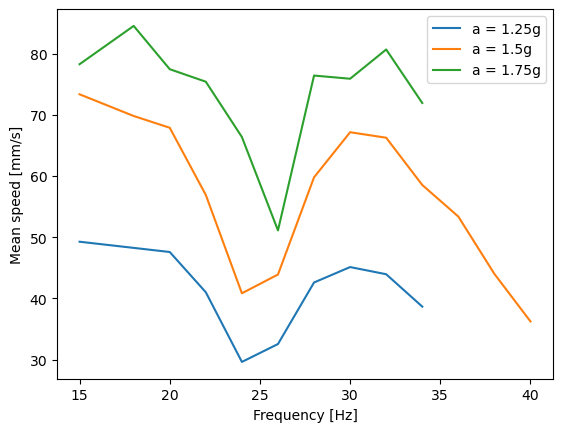

In [26]:
plt.plot(frequencies_125g, v_avg_125g, label="a = 1.25g")
plt.plot(frequencies_15g, v_avg_15g, label="a = 1.5g")
plt.plot(frequencies_175g, v_avg_175g, label="a = 1.75g")

'''plt.scatter(frequencies_125g, v_avg_125g, label="a = 1.25g") #unreadable
plt.scatter(frequencies_15g, v_avg_15g, label="a = 1.5g")
plt.scatter(frequencies_175g, v_avg_175g, label="a = 1.75g")'''

plt.xlabel("Frequency [Hz]")
plt.ylabel("Mean speed [mm/s]")
plt.legend()
plt.show()

In [3]:
mass = 0.27e-3 # kg
max_speed = 80e-3 # m/s

max_KE = 0.5*mass*max_speed**2
print(f"Max average KE carried by a particle is {max_KE:.4} J")

Max average KE carried by a particle is 8.64e-07 J


# Plot distribution

1.75g @ 18Hz

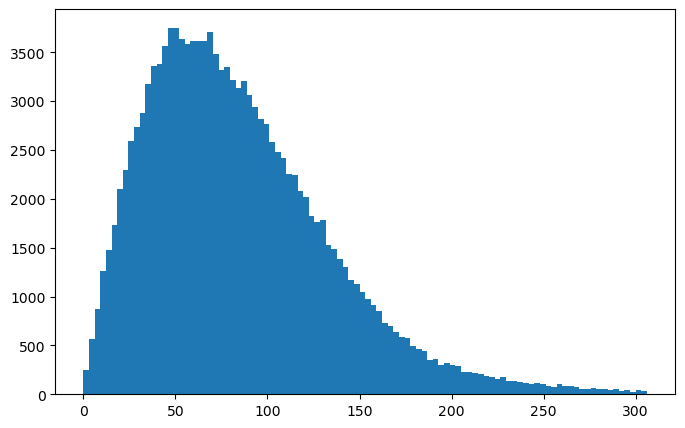

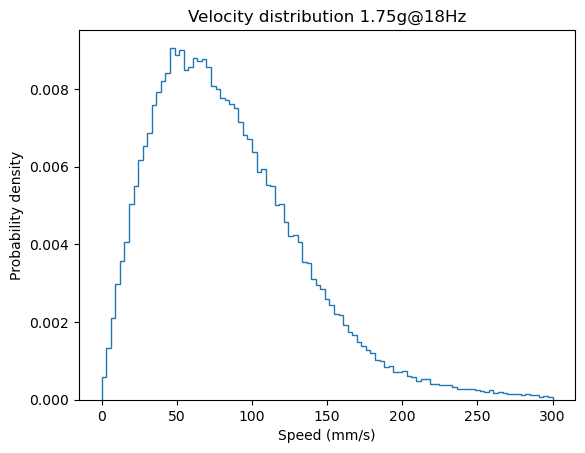

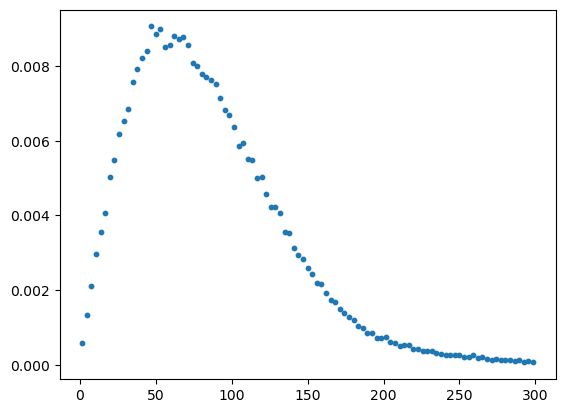

In [35]:
#file_path_175g18Hz = "data/13-11/1.75g/1.75g@18Hz.csv"

#df = pd.read_csv(file_path)
vx = vx_all_175g[1]
vy = vy_all_175g[1]
v = v_all_175g[1]

plt.figure(figsize=(8,5))
plt.hist(v, bins=100)
plt.show()
# make histogram

bins_speed = np.linspace(0, 300, 100)
density_speed, bins_speed = np.histogram(v, bins=bins_speed, density=True)
plt.stairs(density_speed, bins_speed)
plt.ylabel("Probability density")
plt.xlabel("Speed (mm/s)")
plt.title("Velocity distribution 1.75g@18Hz")
plt.show()

speed_space = np.array([(bins_speed[i-1]+bins_speed[i])/2 for i in range(1, len(bins_speed))])
plt.scatter(speed_space, density_speed, s=10)

# Exclude stationary particles (misidentified objects)

In [6]:
df_ex = pd.read_csv("/Users/hervesv/Documents/CloudDrive/IPT/Maxwell_Demon_2025/data/13-11/1.75g/1.75g@15Hz.csv")

p_875 = df_ex.loc[df_ex['particle_id']==875]
print(p_875)

print(f"RMS velocity: {p_875['speed_px/frame'].mean()}")

       Unnamed: 0  frame  particle_id   area        x_px        y_px  \
48521       48521    645          875   22.5  456.103704  385.348148   
48599       48599    646          875   56.5  457.200590  386.277286   
48676       48676    647          875   29.0  456.103448  386.701149   
48752       48752    648          875   36.5  456.013699  384.497717   
48826       48826    649          875   22.0  456.666667  386.318182   
...           ...    ...          ...    ...         ...         ...   
59010       59010    783          875  136.5  459.437118  384.130647   
59083       59083    784          875  141.0  459.832151  384.273050   
59157       59157    785          875  112.0  459.217262  385.062500   
59231       59231    786          875  121.0  459.453168  383.878788   
59305       59305    787          875   69.0  462.700483  382.690821   

             x_mm        y_mm  vx_px/frame  vy_px/frame  speed_px/frame  \
48521  166.287809  140.491512          NaN          NaN     

# Spatial filtering (some zones, such as places where tape is placed)

actually nvm, this won't work well as the videos are individually cropped, so pixel positions won't be consistent between videos. I don't want to have to identify the zones manually for each and every video

In [9]:
import pims
import trackpy as tp
import av

In [ ]:
videopath = "/Users/hervesv/Documents/CloudDrive/IPT/Maxwell_Demon_2025/videos/13-11-25/1.75g/cropped/1.75g@18Hz_detection_window.mov"

# Filter out detections which do not move

Index([  28,   29,   32,   78,   93,   97,  100,  131,  145,  209,
       ...
       2233, 2244, 2247, 2268, 2274, 2280, 2285, 2294, 2297, 2301],
      dtype='int64', name='particle_id', length=175)


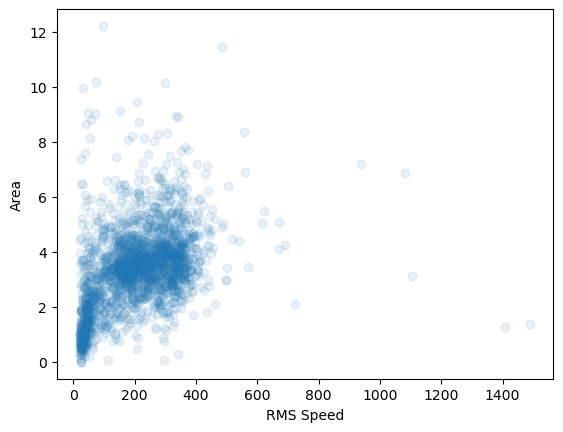

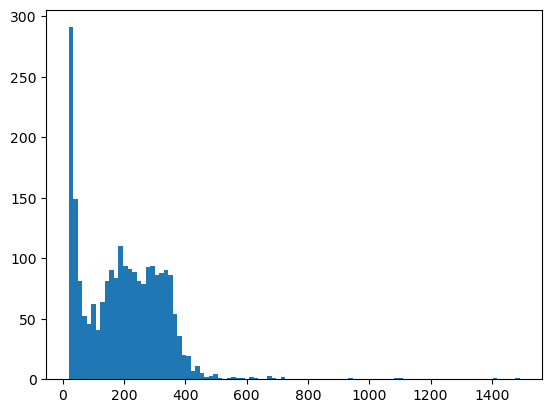

In [55]:
epsilon_rms = 1.3 # px/frame
rms_speed = df_ex.groupby("particle_id")["speed_px/frame"].mean()
bad = rms_speed[rms_speed < epsilon_rms].index
good = rms_speed[rms_speed > epsilon_rms].index
print(bad)

mean_area = df_ex.groupby("particle_id")["area"].mean()

plt.scatter(mean_area, rms_speed, alpha=0.1)
plt.ylabel("Area")
plt.xlabel("RMS Speed")
plt.show()

plt.hist(mean_area, bins=100)
plt.show()

     Unnamed: 0  frame  particle_id  area        x_px        y_px        x_mm  \
0             0      0            0  42.5  630.298039  764.149020  229.796160   
73           73      1            0  40.0  635.579167  764.570833  231.721571   
147         147      2            0  28.0  638.916667  764.630952  232.938368   

           y_mm  vx_px/frame  vy_px/frame  speed_px/frame     vx_mm/s  \
0    278.595997          NaN          NaN             NaN         NaN   
73   278.749783     5.281127     0.421814        5.297946  115.524663   
147  278.771701     3.337500     0.060119        3.338041   73.007812   

      vy_mm/s  speed_mm/s  
0         NaN         NaN  
73   9.227175  115.892573  
147  1.315104   73.019656  


# Filter out ephemeral detections

In [43]:
threshold = 10 # 10 frames minimum
df_pid = df_ex.groupby("particle_id")

short_tracks = [] # keep pid of particles with frames under threshold
for pid, track in df_pid:
    if len(track) < threshold:
        short_tracks.append(pid)

print(len(short_tracks))
print(short_tracks)

print(len(df_pid))


769
[0, 4, 27, 28, 32, 56, 63, 64, 70, 71, 74, 75, 79, 83, 86, 88, 91, 93, 94, 97, 99, 100, 101, 104, 105, 110, 114, 116, 117, 118, 123, 125, 131, 132, 135, 138, 139, 140, 142, 144, 145, 148, 150, 153, 156, 158, 159, 162, 163, 168, 169, 172, 177, 180, 185, 197, 199, 200, 202, 208, 209, 213, 214, 215, 216, 217, 221, 223, 224, 229, 233, 234, 235, 236, 241, 248, 251, 253, 255, 258, 260, 265, 270, 275, 283, 289, 290, 293, 303, 308, 312, 317, 321, 328, 329, 336, 338, 339, 347, 349, 350, 354, 357, 362, 367, 371, 373, 375, 377, 378, 380, 381, 385, 386, 390, 395, 396, 398, 403, 405, 407, 417, 422, 429, 430, 431, 432, 435, 437, 438, 439, 440, 442, 444, 446, 455, 456, 459, 461, 462, 467, 468, 473, 479, 482, 483, 488, 493, 496, 497, 500, 502, 504, 506, 509, 513, 515, 520, 522, 523, 525, 526, 529, 535, 537, 546, 551, 556, 569, 573, 575, 576, 584, 585, 587, 588, 601, 603, 606, 611, 614, 615, 621, 628, 629, 630, 637, 640, 641, 642, 643, 645, 646, 647, 657, 664, 665, 667, 672, 676, 677, 688, 692, 696

# Tougher - filter out particles which do not move significantly for > N frames

In [73]:
n_frames = 120
stoppers_120 = []

for pid, track in df_ex.groupby("particle_id"):
    T = len(track)
    if T < n_frames: continue
    for i in range(T-n_frames):
        subtrack = track[i:i+n_frames]
        sub_rms = subtrack['speed_px/frame'].mean()
        if sub_rms < epsilon_rms:
            stoppers_120.append(pid)
            break


print(len(stoppers_120))
print(stoppers_120)
        

8
[9, 166, 612, 875, 938, 1790, 2055, 2098]


In [67]:
print(len(stoppers_30))
print(len(stoppers_10))

342
342


In [52]:
print(890 in bad)

False


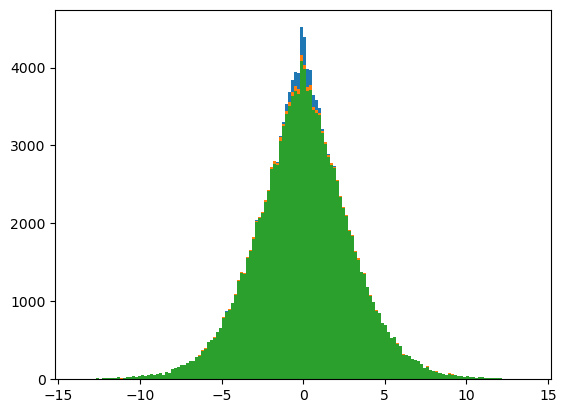

In [50]:
df_good = df_ex[df_ex["particle_id"].isin(good)]
df_good2 = df_good[~df_good["particle_id"].isin(short_tracks)]

# now compare velocity distributions

vx_ex = df_ex['vx_px/frame'].to_numpy()

vx_good = df_good['vx_px/frame'].to_numpy()

vx_good2 = df_good2['vx_px/frame'].to_numpy()

plt.hist(vx_ex, bins=150)
plt.hist(vx_good, bins=150)
plt.hist(vx_good2, bins=150)
#plt.yscale('log')
plt.show()

# Plot MSD

In [68]:
def compute_MSD(df, time_conversion=1, length_conversion=1 ,max_lag=None):
    """
    Computes the Mean Squared Displacement for a tracked dataset.
    
    df: pandas DataFrame with columns ['frame', 'pid', 'x', 'y']
    max_lag: maximum time lag to compute (in frames). 
             Default: full possible range.
    
    Returns: 'lag', 'MSD'
    """

    # Ensure sorted by pid then frame
    df = df.sort_values(["particle_id", "frame"])

    # Determine maximum lag
    if max_lag is None:
        max_lag = df["frame"].max()

    # Store MSD values
    msd_vals = []

    # Loop over lag values
    for lag in range(1, max_lag + 1):
        displacements = []

        # For each particle
        for pid, track in df.groupby("particle_id"):

            frames = track["frame"].values
            xs = track["x_px"].values
            ys = track["y_px"].values

            # For each possible displacement
            for i in range(len(track) - lag):
                if frames[i+lag] == frames[i] + lag:
                    dx = xs[i+lag] - xs[i]
                    dy = ys[i+lag] - ys[i]
                    displacements.append(dx*dx + dy*dy)

        # Average over all particles
        if len(displacements) > 0:
            msd_vals.append(np.mean(displacements))
        else:
            msd_vals.append(np.nan)

    # Return results as a DataFrame
    lags = np.arange(1, max_lag+1)*time_conversion
    msd_vals = np.array(msd_vals)*length_conversion
    return lags, msd_vals




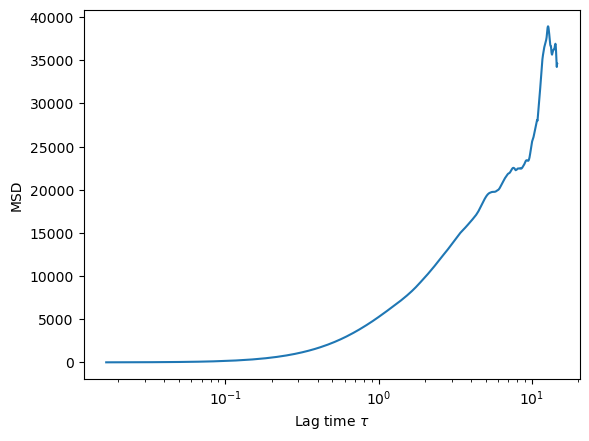

In [13]:
mm_per_px = 350. / (1000-40) # mm / px, quite rough
fps = 60.

df_msd = pd.read_csv("/Users/hervesv/Documents/CloudDrive/IPT/Maxwell_Demon_2025/data/13-11/1.75g/1.75g@15Hz.csv")

lag, msd = compute_MSD(df_msd, time_conversion=1/fps, length_conversion=mm_per_px)

plt.plot(lag, msd)
plt.xscale("log")
plt.xlabel(r"Lag time $\tau$")
plt.ylabel("MSD")
plt.show()

[15634.44771709]
[4933.41023486]


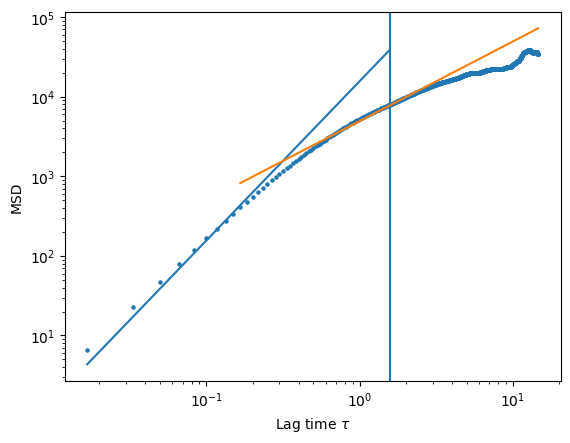

In [53]:
def lin_model(x, a):
    return a*x

def quad_model(x, a):
    return a*x**2


lag_nonan = np.array([lag[i] for i in range(len(lag)) if not np.isnan(msd[i])])
msd_nonan = np.array([msd[i] for i in range(len(msd)) if not np.isnan(msd[i])])

plt.scatter(lag, msd, s=5)

plt.axvline(lag[int(len(lag)*0.05)])

# fit the front half of dataset
lag_half1 = lag_nonan[:int(len(lag)*0.005)]
msd_half1 = msd_nonan[:int(len(lag)*0.005)]
popt1, pcov1 = curve_fit(quad_model, lag_half1, msd_half1)

print(popt1)
plt.plot(lag_nonan[:int(len(lag)*0.05)], quad_model(lag_nonan[:int(len(lag)*0.05)], *popt1))

# fit the back half of dataset
lag_half2 = lag_nonan[int(len(lag)*0.03):int(len(lag)*0.08)]
msd_half2 = msd_nonan[int(len(lag)*0.03):int(len(lag)*0.08)]
popt2, pcov2 = curve_fit(lin_model, lag_half2, msd_half2)
print(popt2)
plt.plot(lag_nonan[int(len(lag)*0.005):], lin_model(lag_nonan[int(len(lag)*0.005):], *popt2))




plt.xscale("log")
plt.yscale("log")
plt.xlabel(r"Lag time $\tau$")
plt.ylabel("MSD")
plt.show()

# Vectorised MSD function

In [69]:
def df_to_tensor(df):
    """
    Convert long-form tracking DataFrame into a tensor P × T × 2.
    df must contain columns: particle_id, frame, x_px, y_px
    Missing frames will be NaN.
    """
    pids = df["particle_id"].unique()
    frames = df["frame"].unique()

    P = len(pids)
    T = len(frames)

    positions = np.full((P, T, 2), np.nan, dtype=float)

    pid_to_idx = {pid: i for i, pid in enumerate(pids)}
    frame_to_idx = {frame: i for i, frame in enumerate(frames)}

    for _, row in df.iterrows():
        p = pid_to_idx[row['particle_id']]
        t = frame_to_idx[row['frame']]
        positions[p, t, 0] = row['x_px']
        positions[p, t, 1] = row['y_px']

    return positions

def compute_msd_fast(positions):
    """
    positions: array of shape (P, T, 2)
    returns: MSD for lags 1..T-1
    """
    P, T, _ = positions.shape
    msd = np.zeros(T)

    # For each lag τ, compute (r(t+τ) - r(t))² averaged over all pids and valid t
    for tau in range(1, T):
        diffs = positions[:, tau:, :] - positions[:, :-tau, :]
        squared = np.sum(diffs**2, axis=2)

        # ignore missing data (nan)
        msd[tau] = np.nanmean(squared)

    return msd


In [57]:
positions = df_to_tensor(df_msd)
msd_fast = compute_msd_fast(positions)*mm_per_px
lag_fast = 1/fps * np.arange(0, len(msd_fast))



/var/folders/fj/wq7sc0qj0sx0bjm834mnq_hw0000gn/T/ipykernel_10293/1734563103.py:90: RuntimeWarning: Mean of empty slice
  msd[tau] = np.nanmean(squared)


# compare to the non-vectorised method

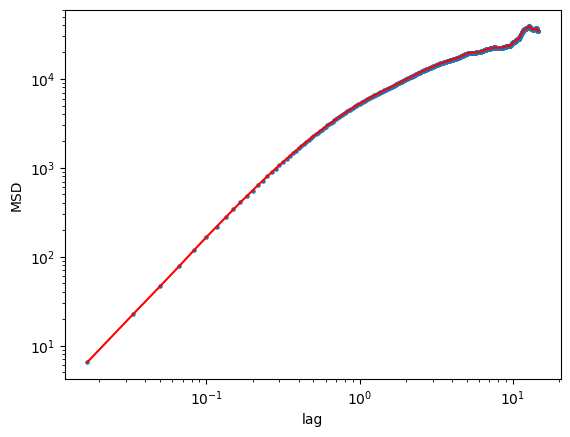

In [67]:
plt.scatter(lag_fast, msd_fast, s=5)
plt.plot(lag, msd, c = 'r')
plt.xlabel("lag")
plt.ylabel("MSD")
plt.xscale("log")
plt.yscale("log")
plt.show()

# Even faster FFT method

Via Wiener-Kinchin theorem

$$MSD(\tau) = \left\langle[r(t+\tau)-r(t)]^2\right\rangle=\left\langle r^2(t+\tau)\right\rangle+\left\langle r^2(t)\right\rangle-2\langle r(t+\tau) r(t)\rangle$$

The last term being the autocorrelation function, which we can compute via the Wiener-Kinchin theorem through the Fourier transform of r(t)


In [70]:
def autocorr_fft(x):
    """
    Compute autocorrelation of a 1D signal x using FFT.
    Returns length len(x) array for lags 0..T-1.
    NaNs are treated as missing data and ignored.
    """

    # Handle NaNs: mask them out
    mask = ~np.isnan(x)
    x = np.where(mask, x, 0.0)
    m = mask.astype(float)

    n = len(x)
    size = 2*n

    # FFT of data and mask
    fx = np.fft.fft(x, size)
    fm = np.fft.fft(m, size)

    # Autocorrelation numerator
    corr = np.fft.ifft(fx * np.conjugate(fx)).real[:n]

    # Autocorrelation denominator (normalization due to missing data)
    norm = np.fft.ifft(fm * np.conjugate(fm)).real[:n]

    # Normalize safely
    with np.errstate(divide="ignore", invalid="ignore"):
        ac = corr / norm

    return ac

def compute_msd_fft(positions):
    """
    Compute MSD using FFT (fastest method).
    positions: array shape (P, T, 2)
    Returns MSD for lags 0..T-1 (MSD[0] = 0).
    """

    P, T, _ = positions.shape
    msd = np.zeros(T)
    count = np.zeros(T)  # for averaging with missing data

    for p in range(P):

        x = positions[p, :, 0]
        y = positions[p, :, 1]

        # skip particles with too many NaNs
        if np.all(np.isnan(x)) or np.all(np.isnan(y)):
            continue

        # squared positions ⟨r²(t)⟩
        r2 = x**2 + y**2

        # Autocorrelation for each coordinate
        Cx = autocorr_fft(x)
        Cy = autocorr_fft(y)

        # Total dot-product autocorrelation
        C = Cx + Cy

        # Compute MSD using: MSD = <r²(t)> + <r²(t+τ)> – 2 C(τ)
        # First term: mean of r²(t)
        r2_mean = np.array([np.nanmean(r2[:T - tau]) for tau in range(T)])
        r2_mean_shift = np.array([np.nanmean(r2[tau:]) for tau in range(T)])

        msd_p = r2_mean + r2_mean_shift - 2 * C

        # Average contribution (ignoring missing regions)
        valid = ~np.isnan(msd_p)
        msd[valid] += msd_p[valid]
        count[valid] += 1

    # Final average across all particles
    msd = msd / np.maximum(count, 1)

    return msd



/var/folders/fj/wq7sc0qj0sx0bjm834mnq_hw0000gn/T/ipykernel_10293/118556878.py:65: RuntimeWarning: Mean of empty slice
  r2_mean_shift = np.array([np.nanmean(r2[tau:]) for tau in range(T)])
/var/folders/fj/wq7sc0qj0sx0bjm834mnq_hw0000gn/T/ipykernel_10293/118556878.py:60: RuntimeWarning: invalid value encountered in add
  C = Cx + Cy
/var/folders/fj/wq7sc0qj0sx0bjm834mnq_hw0000gn/T/ipykernel_10293/118556878.py:64: RuntimeWarning: Mean of empty slice
  r2_mean = np.array([np.nanmean(r2[:T - tau]) for tau in range(T)])
/var/folders/fj/wq7sc0qj0sx0bjm834mnq_hw0000gn/T/ipykernel_10293/118556878.py:71: RuntimeWarning: invalid value encountered in add
  msd[valid] += msd_p[valid]


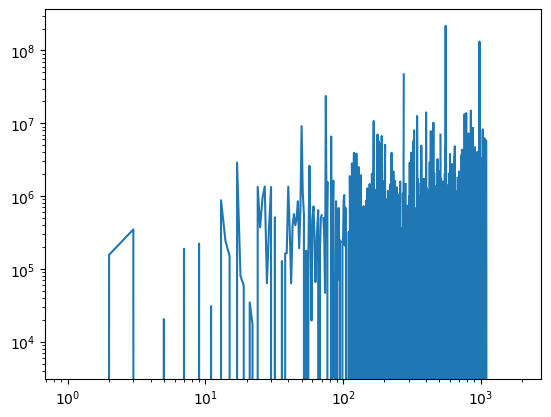

In [72]:
positions = df_to_tensor(df_msd)
msd = compute_msd_fft(positions)

plt.loglog(msd)
plt.show()

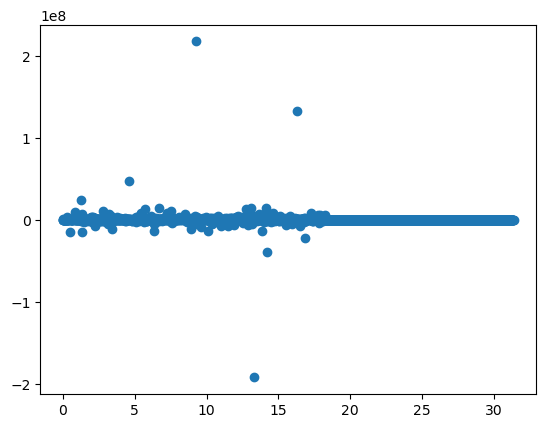

In [74]:


lag_fast_fft = 1/fps * np.arange(0, len(msd))
plt.scatter(lag_fast_fft, msd)